# Lecture 2b: Introduction to Qiskit
**By Adam Fattal**

Welcome to the first practical notebook! In this notebook, we will be introducing qiskit, a package developed by IBM Quantum that allows one to simulate and run quantum circuits and much more! This lecture covers only the surface of Qiskit's functionality. For more, check out Qiskit's [documentation](https://qiskit.org/documentation/) here. 

## Importing Qiskit


In [1]:
from qiskit import *
import numpy as np

## Part 1: Building Circuits

Let's Try To Build these Quantum Circuits:

<img src='assets/1.png'>




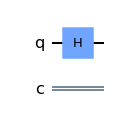

In [2]:
circ1 = QuantumCircuit(1,1) #Building a quantum circuit with 1 qubit and 1 classical bit

circ1.h(0) #Applying an H gate on the qubit

circ1.draw('mpl') #This is how you print out the drawing of a circuit in qiskit

As you can see, ```QuantumCircuit(n,m)``` creates a quantum circuit with $n$ qubits and $m$ classical bits. The initial state of this circuit is the "ground-state" or the $|0\rangle^{\otimes n}$ state 

where 

$$|0\rangle^{\otimes n} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ \vdots \\ 0 \end{pmatrix}$$

(1 followed by $2^n - 1$ 0s)


```circ1.h(0)``` applies the (H)adamard gate which is represented by the following matrix:

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}$$

on the 0th qubit.


Similarly, most quantum gates such as $X,Y,Z,Rx(\theta)$, etc can be applied in a similar manner. Examples will be shown bellow.


Let's try to build this circuit now!

<img src='assets/2.png'>

Here, we add an H to the zeroth qubit and a Z = $\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}$ to the first

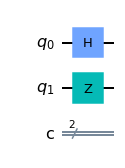

In [3]:
circ2 = QuantumCircuit(2,2)

circ2.h(0)
circ2.z(1)

circ2.draw('mpl')

Now let's build a circuit that have 2-qubit gates. Also let's try to measure the qubits and get results!

<img src='assets/3.png'>

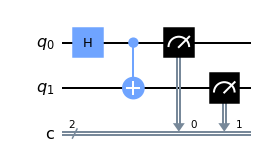

In [4]:
circ3 = QuantumCircuit(2,2)

circ3.h(0) #Applies an H
circ3.cx(0,1) #Applies a CNOT
circ3.measure([0,1],[0,1]) #Measures both qubit states and stores them in classical bits
circ3.draw('mpl')

Here, since we're using a $CNOT$ gate which is a 2 qubit gate, we must choose the control $a$ and the target $b$. The syntax is ```circ.cnot(a,b)``` or ```circ.cx(a,b)``` (they're the same gate). 

Also, ```qc.measure(qubits, bits)``` measures a set of qubits and stores the result in a set of bits.


As shown in the lecture, the outcome of measurement should either be 00 or 11 with 50 percent probability of either. 

## Part 2: Using Quantum Circuits

### Statevectors

In the lecture, we said that a major component of a quantum algorithm involves mapping some initial quantum state (typically $|00 \dots \rangle$ in qiskit) to some output state using some circuit. To get the output state, one can use the qiskit statevector simulator as follows (for circ2):

In [5]:
simulator = Aer.get_backend('statevector_simulator') #Import the statevector simulator
result = execute(circ2,backend = simulator).result() #Executing the statevector simulator on circ2
psi = result.get_statevector() #Storing result
psi #Printing it:

array([ 0.70710678+0.j,  0.70710678+0.j, -0.        +0.j, -0.        +0.j])

In [6]:
np.linalg.norm(psi) #Just a sanity check to see that its norm is 1 (a crucial condition)

1.0

### Getting the Unitary

Suppose you, instead of wanting the final state of a circuit, want the unitary matrix that the gates in the circuit make. You can do this by substituting the word "statevector" to "unitary" in the code block above

In [7]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(circ2,backend = simulator).result()
U = result.get_unitary()
print(U)
print('')
print("The dimensions of U is: ", str(U.shape))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [-0.        +0.00000000e+00j -0.        +0.00000000e+00j
  -0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [-0.        +0.00000000e+00j -0.        +0.00000000e+00j
  -0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]

The dimensions of U is:  (4, 4)


As you can see, we get a $4 \times 4$ unitary matrix. 

Remember that the 2nd postulate states that a final quantum state is equal to the unitary matrix multiplied by the initial quantum state (in the case of qiskit circ2, $|00\rangle$). So this way we can calculate the statevector of circ 2 by U|00>, as done bellow:

In [8]:
U@np.array([1,0,0,0])

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

We get the same result as the statevector_simulator!

### Getting the Bloch Spheres


Whilst we did not have the time to discuss Bloch spheres in the lecture, they're still a very convenient way of describing qubit states. You can either [Learn about them here](https://www.youtube.com/watch?v=a-dIl1Y1aTs) or skip this section

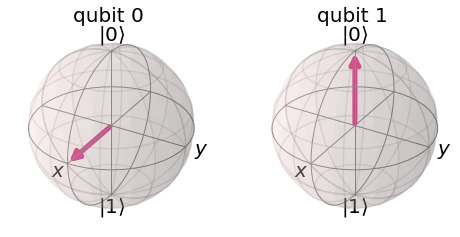

In [9]:
from qiskit.tools.visualization import plot_bloch_multivector

plot_bloch_multivector(psi)

As you can see, qubit 0, which has a Hadamard applied on it. That corresponds to a 90 degree rotation from state |0>. On the other hand, qubit 1 has a Z-gate, which is a phase operation (rotation around XY). Notice how it has no effect on the poles (which correspond to classical states, |0> and |1>)

### Simulating Results


We spoke about the first half of quantum algorithms, states and evolutions, however remember that we want results! We can do that with qiskit using the ```qasm_simulator```, which gets the classical data that comes out of measurement. For example, in circ3, we stated that the results would either be 00 or 11 with 50/50 chance. By measuring the circuit 420 times, we get counts that give us approximately that. If it were measured infinite times, we'd get 50/50. 

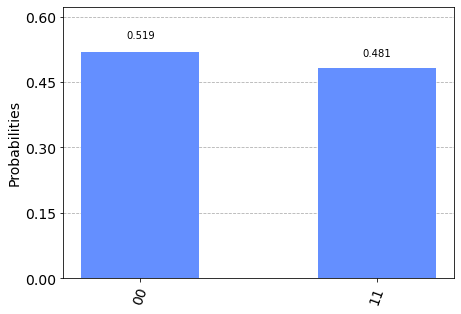

In [10]:
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator') #Importing the qasm_simulator
result = execute(circ3,backend, shots = 420).result() #Executing it
output = result.get_counts() #Storing measurement counts
plot_histogram(output) ##Function which converts counts to probabilities and plots it

**NOTE:** QASM is a classical simulator, meaning that those results did not come out of a quantum computer, but rather just your laptop playing around with pseudo-random numbers. We will try this out on a real QC in a bit (or should I say -- qubit. Im so sorry)

### Full Example

Here, we try to build an arbitrary circuit and get some measurement results

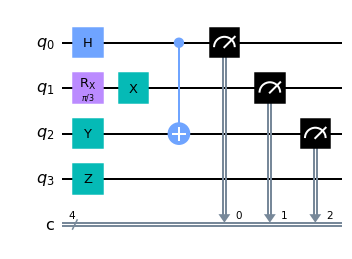

In [11]:
qc = QuantumCircuit(4,4)

qc.h(0) #Apply an H
qc.rx(np.pi/3, 1) #Rotation of pi/3 in the X axis (see bloch sphere)
qc.x(1) #Pauli X
qc.y(2) #Pauli Y
qc.z(3) #Pauli Z
qc.cnot(0,2) #CX [0,2]
qc.measure([i for i in range(3)], [i for i in range(3)]) #Measuring all qubits



backend = Aer.get_backend('qasm_simulator') #Importing QASM sim
result = execute(qc,backend, shots = 420).result() #Executing
output = result.get_counts() #Storing
qc.draw('mpl') #Drawing Our Arbitrary circuit

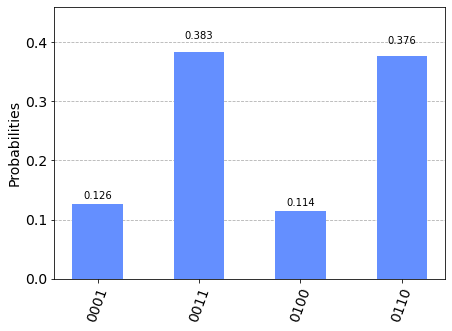

In [12]:
plot_histogram(output) #Plotting Counts of arbitrary circuit

## Part 3: Running circuits on a real quantum computer


In [13]:
#Defining a quantum circuit with 2 qubits and 2 classical bits
phiPlus = QuantumCircuit(2,2)

#Preparing a |Φ+> state (formal name for circ3)
phiPlus.h(0)
phiPlus.cnot(0,1)
phiPlus.measure([0,1],[0,1])


#This is what you type to run on real IBMQ hardware

IBMQ.load_account() #This is how you load your account
provider = IBMQ.get_provider('ibm-q') #This is how you get the ibm-q provider
qcomp = provider.get_backend('ibmq_manila') #This is how you select the device you want to use
job = execute(phiPlus, backend=qcomp, shots=1024) #This is how you tell the device which circuit to run
from qiskit.tools.monitor import job_monitor
job_monitor(job) #Monitor the job
result = job.result() #Get Results

result

Job Status: job has successfully run


Result(backend_name='ibmq_manila', backend_version='1.0.25', qobj_id='4b46a250-86c8-4604-ac8a-be2554c06ba0', job_id='620731b2abe67ca284be75fe', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 528, '0x1': 93, '0x2': 18, '0x3': 385}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-104', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-02-12 04:06:49+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.25'), execution_id='3040c3c0-8bb9-11ec-b413-bc97e15b08d0', time_taken=5.328096866607666, error=None, client_version={'qiskit': '0.25.0'})

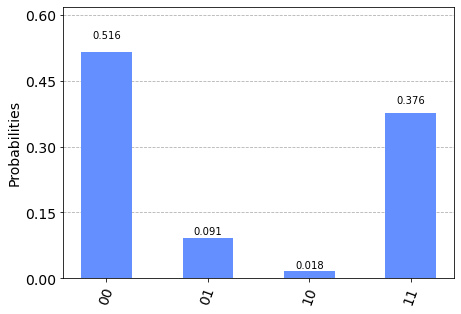

In [14]:
plot_histogram(result.get_counts(phiPlus))

So we now ran our first quantum circuit on a real quantum computer. This would be exciting, except we dont get the results expected. We said we wanted 50/50 for the 00 and 11 state, but ended up getting some measurements of 01 and 10, which theoretically is impossible. 

The reason for that is because current quantum computers are very prone to error and therefore give us wrong results (especially if the circuit has many gates and/or qubits). There are two main reasons for this, one is becsause physical systems tend to go to their lowest energy state (ground state aka |0>) and the other is because, with enough noise, a quantum system will tend to behave classically... this overall phenomenon is called decoherence.

Scientists all over the world are trying to tackle this issue so we can eventually one day have useful quantum computers. 

## Part 4: Grover's Algorithm Demonstration


Grover's algorithm is an example of a quantum algorithm that performs search. While it is quite advanced, an ambitious student can look [here](https://www.youtube.com/watch?v=IT-O-KSWlaE&t=201s). 

This is for demonstration purposes and shows what "real" quantum computing looks like, although this is an extremely basic use case.

In [15]:
PI = np.pi

def groverCircuit(target):

    target_list = [int(x) for x in str(target)] #Converts the target into a list (e.g '1001' => [1,0,0,1])
    n = len(target_list) #Length of target list (i.e nbr of qubits)
    counter = [i for i in range(n)] #List containing integers from 0 to num_qubits - 1

    #Defining a CnP gate. Note that CnP(PI) = CNZ
    def mcp(self, lam, control_qubits, target_qubit):
        from qiskit.circuit.library import MCPhaseGate
        num_ctrl_qubits = len(control_qubits)
        return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                    [])

    #Sub-circuit 1: Hadamard on all qubits
    def hadamards(target):
        hadCirc = QuantumCircuit(n,n)
        hadCirc.h(counter)
        hadCirc.barrier()
        return hadCirc

    #Sub-circuit 2: Oracle 
    def oracle(target):
        filtered = [counter[i] for i in range(n) if target_list[i]==0] #Filtering the counter list to only the indices where target==0
        oracleCirc = QuantumCircuit(n,n)
        if filtered != []:
            oracleCirc.x(filtered) #In other words, if target only has 1s, do nothing 
        mcp(oracleCirc, np.pi, [i for i in range(n-1)],n-1)
        if filtered != []:
            oracleCirc.x(filtered) #Applying X gates to the qubits which represent 0
        oracleCirc.barrier()
        return oracleCirc

    #Sub-circuit 3: Amplifier
    def amplification(target):
        ampCirc = QuantumCircuit(n,n)
        ampCirc.h(counter)
        ampCirc.x(counter)
        mcp(ampCirc, np.pi, [i for i in range(n-1)],n-1)
        ampCirc.x(counter)
        ampCirc.h(counter)
        ampCirc.barrier()
        return ampCirc

    k = round(PI*n/4 - 0.5) #Ideal number of iterations. k = π/4 * √N - 1/2. 

    circuit = hadamards(target) 

    for i in range(k): #Iterating the oracle and amplification 
        circuit+=oracle(target)
        circuit+= amplification(target)

    circuit.measure(counter, counter)
    return circuit

If you managed to take the time to understand what this circuit does, step by step, great job! Although if you didn't, all you have to know is that it is how quantum computers search and we will be using it to try to search for the bit-string `1001` bellow

<ipython-input-15-92322f76ec42>:51: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit+=oracle(target)
/opt/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


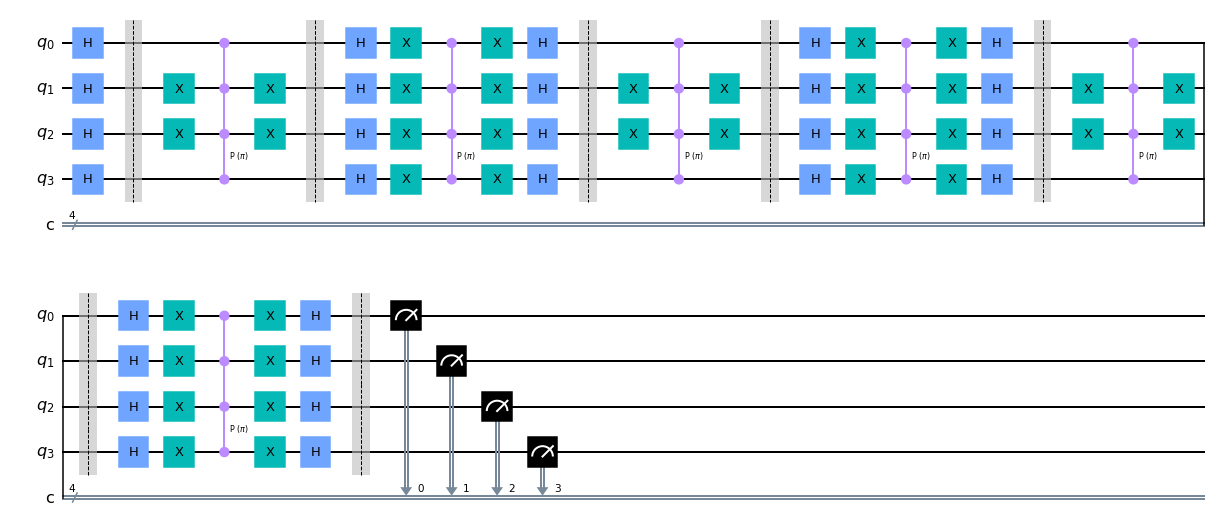

In [16]:
from qiskit.tools.visualization import plot_histogram
circuit = groverCircuit('1001') #Apply our circuit above to the input 1001, you can change this
                                #to any bitstring of your choosing

#Getting measurement results of 420 repeats
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend, shots = 420).result()
output = result.get_counts()
circuit.draw('mpl')

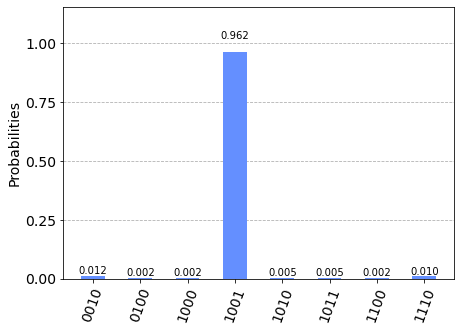

In [17]:
plot_histogram(output)

As you can see, by building this relatively large circuit, we get counts that give us, with very high probability '1001'. Set up your IBMQ account and test this on a real quantum computer -- will be a _slightly_ different story

## Further Reading:


[1] <a href='https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY'>Qiskit Tutorial by Qiskit</a>

[2] <a href='https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html'>Qiskit Summary of Operations </a>

[3] <a href='https://qiskit.org/textbook/preface.html'>Qiskit Textbook</a>

[4] <a href='https://www.youtube.com/watch?v=yprDIC-9D0k'>Getting Started with Qiskit Demo </a>